In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gdpraw=pd.read_csv('../Inputs/GDPInputs/GDP_1997_2017.csv')

In [4]:
gdpraw.head()

,GeoFIPS,GeoName,Region,TableName,ComponentName,Unit,IndustryId,IndustryClassification,Description,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,8577552,...,14712845,14448932,14992052,15542582,16197007,16784851,17521747,18219297,18707189,19485394
1,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,2.0,...,Private industries,7431991.6,...,12731236.5,12403879.9,12884088.6,13405520,14037518.8,14572341,15250030.3,15878808,16319357.2,17031689.7
2,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,3.0,11,"Agriculture, forestry, fishing, and hunting",108636.5,...,147244,129967.8,146299,180944.9,179572.7,215600.6,200841.6,181220.2,164913.2,169225.2
3,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,4.0,111-112,Farms,88136,...,119476,103102,117629,152249,148939,184621,167940,146376,129458,(NA)
4,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,5.0,113-115,"Forestry, fishing, and related activities",20500.5,...,27768,26865.8,28670,28695.8,30633.7,30979.6,32901.6,34844.2,35455.2,(NA)


In [5]:
gdpdata=gdpraw.loc[gdpraw['Description']=='All industry total',['GeoName','1997','1998','1999','2000','2001','2002','2003','2004','2005',
                 '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
gdpdata.set_index('GeoName',inplace=True)
gdpdata=gdpdata.transpose()
gdpdata

GeoName,United States*,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
1997,8577552,104087.4,25744.8,132418,59865.6,1070523.6,136675.3,138648.8,32967.7,52451.9,...,153240.7,14724.3,489155.6,1627119.8,1382867.1,560926.9,1829512.4,874281.6,257845.5,1489302.8
1998,9062817,109404.3,24170.4,143392.4,62442.5,1147841.6,150381.7,145495.4,36783.2,54879.8,...,162523,14928.2,514166.9,1699551.6,1457511.9,587493.8,1947923.5,920980.7,279030.1,1590268
1999,9630663,115030.9,24732.6,155344.5,66816.7,1247093,164226.8,152338.1,40363.6,58832.1,...,172258.1,15710.9,542834.3,1799489.4,1538276.7,613249.8,2076000.4,973835.7,300928.4,1720712.1
2000,10252347,119242.4,26778.3,164611.6,68770,1366561,180605.5,165898.7,43389.4,61095.5,...,180539,17205.4,590719.9,1904911.1,1613515.1,653313.9,2179924.8,1049508.2,327980.8,1866556.6
2001,10581822,122449.3,28420.4,171474.2,70601.4,1384111.2,187571.9,173127.2,46448.3,65565.9,...,187939.3,18660.7,610358,1993334.1,1638932.3,670896.1,2272536.7,1097234.1,339694.4,1892552.9
2002,10936418,127792.3,29605.3,179413.3,73950.4,1436430.9,190962.8,176208.2,45757.9,70054.7,...,194813.1,19115.6,627332.9,2046227.7,1695545.3,697439.8,2364078.3,1123889.5,348673,1965635.5
2003,11458246,133739.2,31799.7,192751.2,78218.8,1527294,196483.7,181339.7,47761.6,74090.3,...,203134.7,21027.5,651259.2,2116127.8,1754840.2,734780.4,2490897.1,1190654.7,362639.7,2084276
2004,12213730,146524.7,34970.7,205420.8,84624.5,1632216.9,203980.2,198662.4,51449.4,80471.3,...,215138.9,23186.7,693897,2238502.8,1837593.2,781914.4,2674952.2,1294631.2,384547,2231723.6
2005,13036637,155970.4,39774.8,228231.2,89610,1753866.2,219907.9,208766.2,52154.1,85304.9,...,225697.9,27177.6,725250.8,2364793.2,1916168.3,821556.1,2886987.1,1412879.9,419773,2409928.3
2006,13814609,163853.6,44435.3,248230.7,94384.5,1874737.3,231205.9,222889.1,55067.4,88517.2,...,235708.6,32405.1,763509.5,2485301.1,1985254.5,857209.6,3057556.9,1548035.3,453644.7,2581433.9


In [6]:
gdppercchange=gdpdata.astype(float).pct_change()

In [7]:
Colorado=gdppercchange.loc[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],['Colorado']]
Washington=gdppercchange.loc[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],['Washington']]
Oregon=gdppercchange.loc[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],['Oregon']]
US=gdppercchange.loc[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],['United States*']]

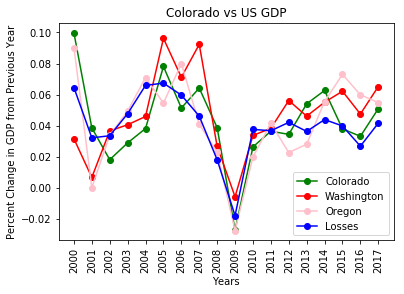

In [8]:
# Create a list of the years that we will use as our x axis
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, Colorado , color="green", label="Colorado",marker='o')
plt.plot(years, Washington , color="red", label="Washington",marker='o')
plt.plot(years, Oregon , color="pink", label="Oregon",marker='o')

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, US, color="blue", label="Losses",marker='o')

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Colorado vs US GDP")
plt.xlabel("Years")
plt.ylabel("Percent Change in GDP from Previous Year")
plt.xticks(years,rotation='vertical')

# Print our chart to the screen
plt.show()

In [9]:
gdp2=pd.DataFrame()
gdp2['Legal']=gdpdata['Colorado'].astype(float)+gdpdata['Washington'].astype(float)+gdpdata['Oregon'].astype(float)+gdpdata['Nevada'].astype(float)


In [10]:
other_states=['Alabama','Alaska','Arizona','Arkansas','California','Connecticut','Delaware','District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa',
'Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','New Hampshire','New Jersey',
'New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah',
'Vermont','Virginia','West Virginia','Wisconsin','Wyoming']

gdp2['Not Legal']=0
for state in other_states:
    gdp2['Not Legal']=gdp2['Not Legal']+gdpdata['{}'.format(state)].astype(float)


In [11]:
gdp2=gdp2.pct_change()

In [12]:
gdp2

,Legal,Not Legal
1997,NaN,NaN
1998,0.079175,0.055737
1999,0.080694,0.062078
2000,0.067019,0.064800
2001,0.020212,0.033082
2002,0.032681,0.033654
2003,0.042817,0.047833
2004,0.062458,0.066301
2005,0.087824,0.066252
2006,0.068904,0.059199
